- 본 실습은 데이터 사전 준비가 필요합니다.
- 아래 캐글 컴피티션에서 동의 후 Dataset을 다운받기 바랍니다.
- https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

In [6]:
# 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

%matplotlib inline

In [7]:
import pandas as pd

In [8]:
#경로
path = "/content/drive/MyDrive/Colab Notebooks/youtube/퇴근후텐서플로/input/" 

# 데이터 불러오기
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
data = pd.read_csv(path+'icml_face_data.csv')
# icml_face_data 파일에 훈련용, 검증용, 테스트용 데이터가 포함됨

In [9]:
train.shape, test.shape, data.shape

((28709, 2), (7178, 1), (35887, 3))

In [11]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [16]:
# 데이터 종류
data[' Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name:  Usage, dtype: int64

In [73]:
# 0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'
data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

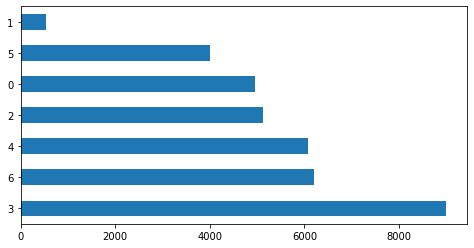

In [25]:
data['emotion'].value_counts().plot(kind='barh', figsize=(8, 4))

In [26]:
# 첫 번째 데이터
data[' pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [27]:
# 첫 번째 데이터 길이
len(data[' pixels'][0])

8287

In [28]:
# The data consists of 48x48 pixel grayscale images of faces. 
48*48

2304

In [30]:
# (np.fromstring 설명코드) 공백으로 구분된 데이터를 넘파이로 변경
temp = np.fromstring(data[' pixels'][0], dtype=int, sep=' ')

print(len(temp))

2304


In [41]:
type(temp)

numpy.ndarray

In [34]:
# 데이터 전처리 함수
def preprocessing(data):
    image = np.zeros(shape=(len(data), 48, 48)) # 빈 넘파이형태 (48*48)
    label = np.array(list(map(int, data['emotion']))) 
    for i, row in enumerate(data.index):
        df = np.fromstring(data[' pixels'][row], dtype=int, sep=' ') # 공백으로 구분된 데이터를 넘파이로 변경
        df = np.reshape(df, (48, 48)) 
        image[i] = df
    return image, label

In [35]:
# Train, Validation, Test 데이터 구분
x_train, y_train = preprocessing(data[data[' Usage']=='Training'])
x_val, y_val = preprocessing(data[data[' Usage']=='PrivateTest'])
x_test, y_test = preprocessing(data[data[' Usage']=='PublicTest'])

In [36]:
x_train.shape, x_val.shape, x_test.shape

((28709, 48, 48), (3589, 48, 48), (3589, 48, 48))

lable: 0


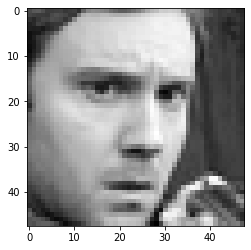

In [37]:
plt.imshow(x_train[0], cmap='gray')
print("lable:",y_train[0])

lable: 3


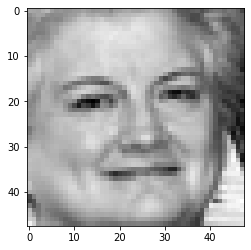

In [38]:
plt.imshow(x_train[100], cmap='gray')
print("lable:",y_train[100])

In [82]:
# 모델1
model = Sequential([
                    Flatten(input_shape=(48,48)),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련(학습)
history = model.fit(x_train, y_train,  validation_data=(x_val, y_val), epochs=5, batch_size=64) 

Epoch 1/5
449/449 [==============================] - 2s 4ms/step - loss: 33.7344 - accuracy: 0.2011 - val_loss: 2.2308 - val_accuracy: 0.1649
Epoch 2/5
449/449 [==============================] - 2s 3ms/step - loss: 2.1115 - accuracy: 0.2496 - val_loss: 2.0399 - val_accuracy: 0.2452
Epoch 3/5
449/449 [==============================] - 2s 4ms/step - loss: 1.9825 - accuracy: 0.2516 - val_loss: 1.9552 - val_accuracy: 0.2452
Epoch 4/5
449/449 [==============================] - 1s 3ms/step - loss: 1.9186 - accuracy: 0.2517 - val_loss: 1.9089 - val_accuracy: 0.2452
Epoch 5/5
449/449 [==============================] - 2s 3ms/step - loss: 1.8829 - accuracy: 0.2516 - val_loss: 1.8818 - val_accuracy: 0.2452


In [83]:
# 모델2
model = Sequential([
                    Flatten(input_shape=(48,48)),
                    BatchNormalization(),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련(학습)
history = model.fit(x_train, y_train,  validation_data=(x_val, y_val), epochs=5, batch_size=64) 

Epoch 1/5
449/449 [==============================] - 3s 6ms/step - loss: 1.7954 - accuracy: 0.3437 - val_loss: 1.6286 - val_accuracy: 0.3717
Epoch 2/5
449/449 [==============================] - 3s 6ms/step - loss: 1.5771 - accuracy: 0.3924 - val_loss: 1.5710 - val_accuracy: 0.3993
Epoch 3/5
449/449 [==============================] - 3s 6ms/step - loss: 1.5234 - accuracy: 0.4117 - val_loss: 1.5517 - val_accuracy: 0.4032
Epoch 4/5
449/449 [==============================] - 3s 6ms/step - loss: 1.4775 - accuracy: 0.4328 - val_loss: 1.5566 - val_accuracy: 0.4057
Epoch 5/5
449/449 [==============================] - 3s 6ms/step - loss: 1.4398 - accuracy: 0.4507 - val_loss: 1.5409 - val_accuracy: 0.4068


In [84]:
loss, acc = model.evaluate(x_test, y_test)
print('test정확도:', acc)

113/113 [==============================] - 0s 1ms/step - loss: 1.5509 - accuracy: 0.4068
test정확도: 0.4067985415458679


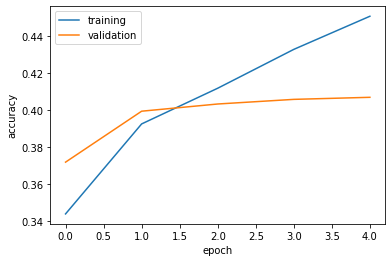

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])

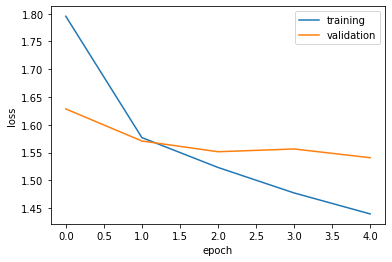

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'])